### Importing Python Libraries

In [ ]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam

# Question-1

### 1. Generating Data

In [ ]:
X1, Y1, X2, Y2, X3, Y3, X4, Y4 = [], [], [], [], [], [], [], []

for _ in range(100):
    # Negative Samples
    X1.append([1, random.uniform(0, 2), random.uniform(0, 2)])
    Y1.append(-1)
    X2.append([1, random.uniform(0, 2), random.uniform(0, 2)])
    Y2.append(-1)
    X3.append([1, random.uniform(0, 2), random.uniform(0, 2)])
    Y3.append(-1)
    X4.append([1, random.uniform(0, 2), random.uniform(0, 2)])
    Y4.append(-1)
    
    # Positive Samples
    X1.append([1, random.uniform(3, 5), random.uniform(3, 5)])
    Y1.append(1)
    X2.append([1, random.uniform(2, 4), random.uniform(2, 4)])
    Y2.append(1)
    X3.append([1, random.uniform(0, 2), random.uniform(2, 4)])
    Y3.append(1)
    X4.append([1, random.uniform(1, 3), random.uniform(1, 3)])
    Y4.append(1)

In [ ]:
X1, Y1 = np.array(X1), np.array(Y1)
X2, Y2 = np.array(X2), np.array(Y2)
X3, Y3 = np.array(X3), np.array(Y3)
X4, Y4 = np.array(X4), np.array(Y4)

### 1.1 Plotting the Data

(0.0, 5.0)

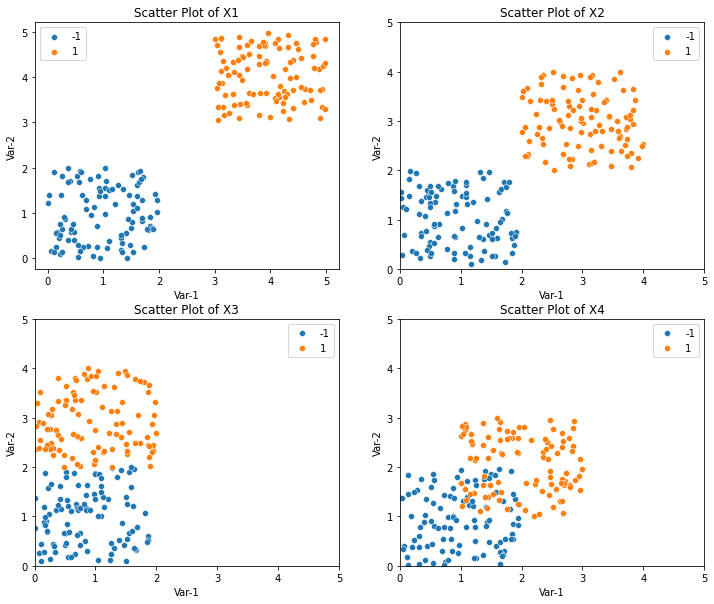

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 10))

sns.scatterplot(x=X1[Y1==-1].T[1], y=X1[Y1==-1].T[2], ax=ax1)
sns.scatterplot(x=X1[Y1==1].T[1], y=X1[Y1==1].T[2], ax=ax1)
ax1.legend([-1, 1])
ax1.set_title("Scatter Plot of X1")
ax1.set_xlabel("Var-1")
ax1.set_ylabel("Var-2")

sns.scatterplot(x=X2[Y2==-1].T[1], y=X2[Y2==-1].T[2], ax=ax2)
sns.scatterplot(x=X2[Y2==1].T[1], y=X2[Y2==1].T[2], ax=ax2)
ax2.legend([-1, 1])
ax2.set_title("Scatter Plot of X2")
ax2.set_xlabel("Var-1")
ax2.set_ylabel("Var-2")
ax2.set_xlim([0, 5])
ax2.set_ylim([0, 5])

sns.scatterplot(x=X3[Y3==-1].T[1], y=X3[Y3==-1].T[2], ax=ax3)
sns.scatterplot(x=X3[Y3==1].T[1], y=X3[Y3==1].T[2], ax=ax3)
ax3.legend([-1, 1])
ax3.set_title("Scatter Plot of X3")
ax3.set_xlabel("Var-1")
ax3.set_ylabel("Var-2")
ax3.set_xlim([0, 5])
ax3.set_ylim([0, 5])

sns.scatterplot(x=X4[Y4==-1].T[1], y=X4[Y4==-1].T[2], ax=ax4)
sns.scatterplot(x=X4[Y4==1].T[1], y=X4[Y4==1].T[2], ax=ax4)
ax4.legend([-1, 1])
ax4.set_title("Scatter Plot of X4")
ax4.set_xlabel("Var-1")
ax4.set_ylabel("Var-2")
ax4.set_xlim([0, 5])
ax4.set_ylim([0, 5])

### Perceptron Algorithm

In [ ]:
def accuracy(Y, y_pred):
    count = 0
    for val in Y == y_pred:
        if val:
            count += 1
    
    return count/Y.shape[0]

def thresh(x):
    val = []
    for i in x:
        if i > 0:
            val.append(1)
        else:
            val.append(-1)
    
    return np.array(val)

def perceptron(X, Y, W, learning_rate, iterations=100):
    while(iterations):
        y_pred = thresh(X@W)
        D = 0.5*(Y1[Y1 != y_pred] - y_pred[Y1 != y_pred])

        for x, d in zip(X1[Y1 != y_pred], D):
            W += learning_rate*d*x
        
        iterations -= 1
    
    y_pred = thresh(X@W)
    acc = accuracy(Y1, y_pred)

    return W, acc

### 1.2 For X1
Learning Rate = 0.01 and 0.05     
Initial Weights = (1, 1, -0.5)

In [ ]:
W = np.array([1, 1, -0.5])
learning_rate = [0.01, 0.05]

Final_Weights, Accuracy = perceptron(X1, Y1, W, learning_rate[0])
print("\nLearning Rate -> 0.01\nFinal Weights: ", Final_Weights)
print(f"Accuracy     :  {Accuracy*100}%")

Final_Weights, Accuracy = perceptron(X1, Y1, W, learning_rate[1])
print("\nLearning Rate -> 0.05\nFinal Weights: ", Final_Weights)
print(f"Accuracy     :  {Accuracy*100}%")


Learning Rate -> 0.01
Final Weights:  [-1.88        1.04683176 -0.23842361]
Accuracy     :  100.0%

Learning Rate -> 0.05
Final Weights:  [-1.88        1.04683176 -0.23842361]
Accuracy     :  100.0%


### 1.2 For X2
Learning Rate = 0.01 and 0.05   
Initial Weights = (1, 1, -0.5)

In [ ]:
W = np.array([1, 1, -0.5])
learning_rate = [0.01, 0.05]

Final_Weights, Accuracy = perceptron(X2, Y2, W, learning_rate[0])
print("\nLearning Rate -> 0.01\nFinal Weights: ", Final_Weights)
print(f"Accuracy     :  {Accuracy*100}%")

Final_Weights, Accuracy = perceptron(X2, Y2, W, learning_rate[1])
print("\nLearning Rate -> 0.05\nFinal Weights: ", Final_Weights)
print(f"Accuracy     :  {Accuracy*100}%")


Learning Rate -> 0.01
Final Weights:  [-2.93        1.38323636  0.14824331]
Accuracy     :  100.0%

Learning Rate -> 0.05
Final Weights:  [-2.93        1.38323636  0.14824331]
Accuracy     :  100.0%


### 1.2 For X3
Learning Rate = 0.01 and 0.05   
Initial Weights = (1, 1, -0.5)

In [ ]:
W = np.array([1, 1, -0.5])
learning_rate = [0.01, 0.05]

Final_Weights, Accuracy = perceptron(X3, Y3, W, learning_rate[0])
print("\nLearning Rate -> 0.01\nFinal Weights: ", Final_Weights)
print(f"Accuracy     :  {Accuracy*100}%")

Final_Weights, Accuracy = perceptron(X3, Y3, W, learning_rate[1])
print("\nLearning Rate -> 0.05\nFinal Weights: ", Final_Weights)
print(f"Accuracy     :  {Accuracy*100}%")


Learning Rate -> 0.01
Final Weights:  [-20.32         9.27715619   7.54016986]
Accuracy     :  85.0%

Learning Rate -> 0.05
Final Weights:  [-105.37         48.13024897   39.1560897 ]
Accuracy     :  84.5%


### 1.2 For X4
Learning Rate = 0.01 and 0.05   
Initial Weights = (1, 1, -0.5)

In [ ]:
W = np.array([1, 1, -0.5])
learning_rate = [0.01, 0.05]

Final_Weights, Accuracy = perceptron(X4, Y4, W, learning_rate[0])
print("\nLearning Rate -> 0.01\nFinal Weights: ", Final_Weights)
print(f"Accuracy     :  {Accuracy*100}%")

Final_Weights, Accuracy = perceptron(X4, Y4, W, learning_rate[1])
print("\nLearning Rate -> 0.05\nFinal Weights: ", Final_Weights)
print(f"Accuracy     :  {Accuracy*100}%")


Learning Rate -> 0.01
Final Weights:  [-16.8          6.49229892   6.08345077]
Accuracy     :  86.0%

Learning Rate -> 0.05
Final Weights:  [-88.55        33.5145557   32.60395737]
Accuracy     :  86.5%


### 1.3 For X3

Learning Rate = 0.05   
Initial Weights = (1, 1, 0.5)

In [ ]:
W = np.array([1, 1, 0.5])
learning_rate = 0.05

Final_Weights, Accuracy = perceptron(X3, Y3, W, learning_rate)
print("Final Weights: ", Final_Weights)
print(f"Accuracy     :  {Accuracy*100}%")

Final Weights:  [-91.45        41.79845313  33.94028943]
Accuracy     :  84.5%


# Question 2

### Generating Data (Training)

In [ ]:
x = list(np.random.normal(-5, size=20)) + list(np.random.normal(5, size=20)) + list(np.random.normal(10, size=20)) + \
list(np.random.normal(-5, size=20)) + list(np.random.normal(0, size=20)) + list(np.random.normal(5, size=20)) + list(np.random.normal(15, size=20))

y =  list(np.random.normal(5, size=20)) + list(np.random.normal(-5, size=20)) + list(np.random.normal(0, size=20)) + \
list(np.random.normal(-5, size=20)) + list(np.random.normal(0, size=20)) + list(np.random.normal(5, size=20)) + list(np.random.normal(-5, size=20))

# Training Data
X1 = np.array([x, y]).T
Y1 = np.array([1]*60 + [0]*80)

### Generating Data (Testing)

In [ ]:
x = list(np.random.normal(-5, size=20)) + list(np.random.normal(5, size=20)) + list(np.random.normal(10, size=20)) + \
list(np.random.normal(-5, size=20)) + list(np.random.normal(0, size=20)) + list(np.random.normal(5, size=20)) + list(np.random.normal(15, size=20))

y =  list(np.random.normal(5, size=20)) + list(np.random.normal(-5, size=20)) + list(np.random.normal(0, size=20)) + \
list(np.random.normal(-5, size=20)) + list(np.random.normal(0, size=20)) + list(np.random.normal(5, size=20)) + list(np.random.normal(-5, size=20))

# Training Data
X2 = np.array([x, y]).T
Y2 = np.array([1]*60 + [0]*80)

### Plotting the Training Data

Text(0, 0.5, 'Var-2')

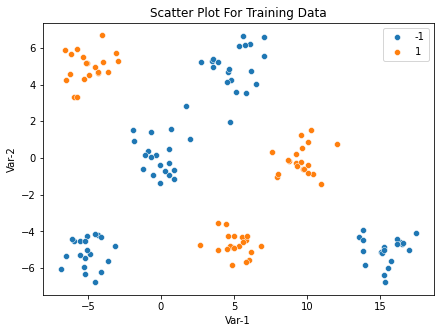

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=X1[Y1==0].T[0], y=X1[Y1==0].T[1])
sns.scatterplot(x=X1[Y1==1].T[0], y=X1[Y1==1].T[1])
plt.legend([-1, 1])
plt.title("Scatter Plot For Training Data")
plt.xlabel("Var-1")
plt.ylabel("Var-2")

### Function to Plot Decision Boundary

In [ ]:
def plot_decision_boundary(X, y, model, steps=1000):
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, alpha=0.5)
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, lw=0)
    ax.set_title("Decision Boundary and Test Data Points")

### Function to Plot Accuracy vs Epochs and Loss vs Epochs

In [ ]:
def plot_acc_loss(history):
    plt.figure(figsize = (12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], 'g')
    plt.title('Training Accuracy vs Epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], 'r')
    plt.title('Training Loss vs Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')

    plt.show()

### 1.2a Neural Network - 1 (2 Neurons in Hidden Layer)

Learning Rate -> 0.01

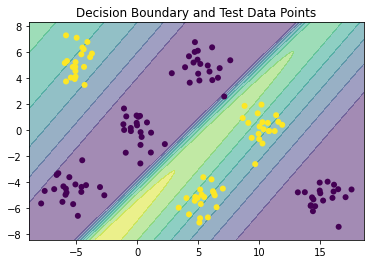

In [ ]:
ann = models.Sequential([
    layers.Dense(2, activation='tanh'),
    layers.Dense(1, activation='relu')])

ann.compile(optimizer=Adam(0.01),
            loss='binary_crossentropy',
            metrics=['accuracy'])

history = ann.fit(X1, Y1, epochs=900, shuffle=True, verbose=0)

plot_decision_boundary(X2, Y2, ann)

5/5 [==============================] - 0s 2ms/step - loss: 0.0206 - accuracy: 0.9929


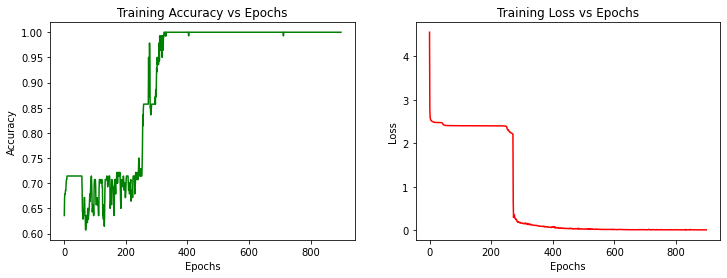

In [ ]:
ann.evaluate(X2, Y2)
plot_acc_loss(history)

### 1.2b Neural Network - 2 (4 Neurons in Hidden Layer)

Learning Rate -> 0.01

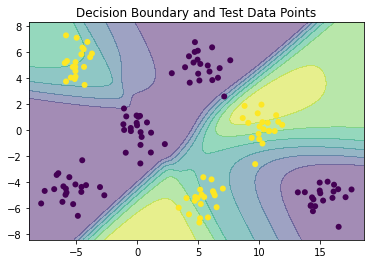

In [ ]:
ann = models.Sequential([
    layers.Dense(4, activation='tanh'),
    layers.Dense(1, activation='relu')])

ann.compile(optimizer=Adam(0.01),
            loss='binary_crossentropy',
            metrics=['accuracy'])

history = ann.fit(X1, Y1, epochs=900, shuffle=True, verbose=0)

plot_decision_boundary(X2, Y2, ann)

5/5 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 0.9929


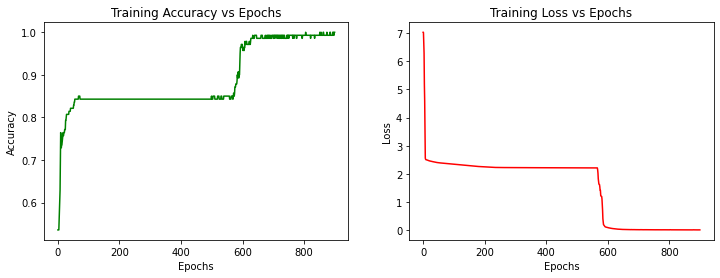

In [ ]:
ann.evaluate(X2, Y2)
plot_acc_loss(history)

### 1.3a Neural Network - 1 (2 Neurons in Hidden Layer)

Learning Rate -> 0.0001

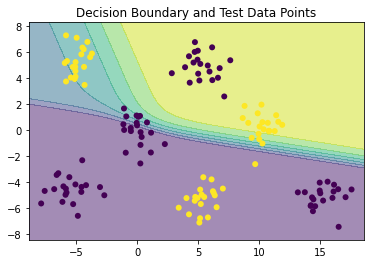

In [ ]:
ann = models.Sequential([
    layers.Dense(2, activation='tanh'),
    layers.Dense(1, activation='relu')])

ann.compile(optimizer=Adam(0.0001),
            loss='binary_crossentropy',
            metrics=['accuracy'])

history = ann.fit(X1, Y1, epochs=900, shuffle=True, verbose=0)

plot_decision_boundary(X2, Y2, ann)

5/5 [==============================] - 0s 4ms/step - loss: 4.7271 - accuracy: 0.6571


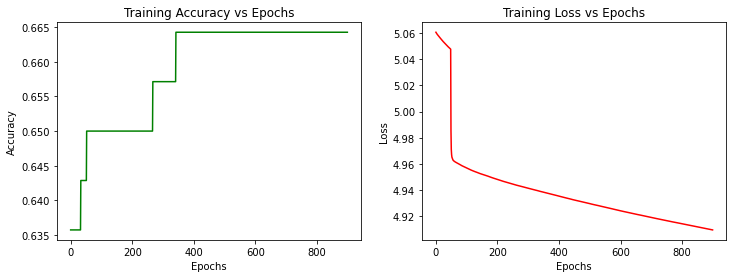

In [ ]:
ann.evaluate(X2, Y2)
plot_acc_loss(history)

### 1.3b Neural Network - 2 (4 Neurons in Hidden Layer)

Learning Rate -> 0.0001

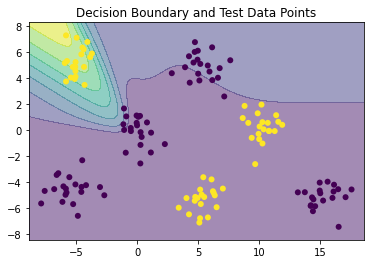

In [ ]:
ann = models.Sequential([
    layers.Dense(4, activation='tanh'),
    layers.Dense(1, activation='relu')])

ann.compile(optimizer=Adam(0.0001),
            loss='binary_crossentropy',
            metrics=['accuracy'])

history = ann.fit(X1, Y1, epochs=900, shuffle=True, verbose=0)

plot_decision_boundary(X2, Y2, ann)

5/5 [==============================] - 0s 1ms/step - loss: 3.8171 - accuracy: 0.7143


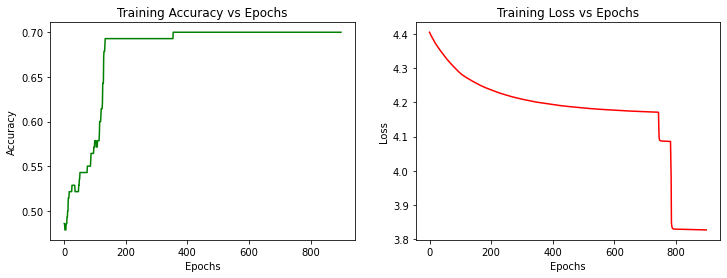

In [ ]:
ann.evaluate(X2, Y2)
plot_acc_loss(history)

### 1.4a Adaptive Back Propagation Algorithm (Neural Network - 1)

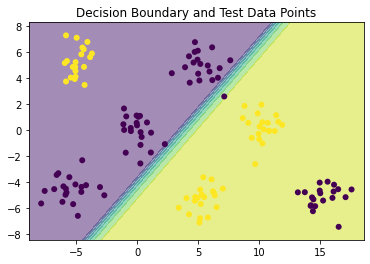

In [ ]:
ann = models.Sequential([
    layers.Dense(2, activation='tanh'),
    layers.Dense(1, activation='relu')])

ann.compile(optimizer=Adam(0.0001, 1.05, 0.7),
            loss='binary_crossentropy',
            metrics=['accuracy'])

history = ann.fit(X1, Y1, epochs=900, shuffle=True, verbose=0)

plot_decision_boundary(X2, Y2, ann)

5/5 [==============================] - 0s 0s/step - loss: 2.4831 - accuracy: 0.7071


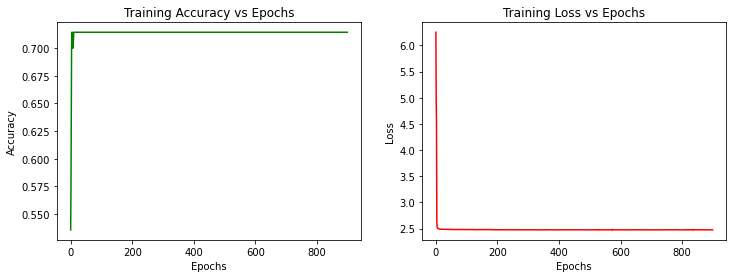

In [ ]:
ann.evaluate(X2, Y2)
plot_acc_loss(history)

### 1.4b Adaptive Back Propagation Algorithm (Neural Network - 2)

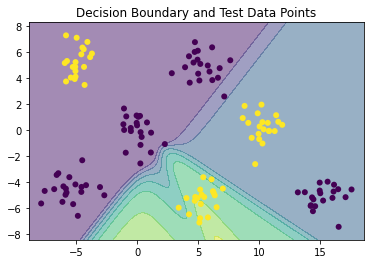

In [ ]:
ann = models.Sequential([
    layers.Dense(4, activation='tanh'),
    layers.Dense(1, activation='relu')])

ann.compile(optimizer=Adam(0.0001, 1.05, 0.7),
            loss='binary_crossentropy',
            metrics=['accuracy'])

history = ann.fit(X1, Y1, epochs=900, shuffle=True, verbose=0)

plot_decision_boundary(X2, Y2, ann)

5/5 [==============================] - 0s 3ms/step - loss: 2.4103 - accuracy: 0.7143


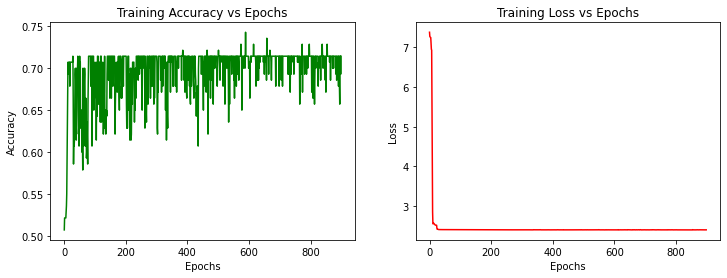

In [ ]:
ann.evaluate(X2, Y2)
plot_acc_loss(history)